# Dynamics of a Double Pendulum

In this notebook, we will study the dynamics of a double pendulum. Like before, we'll derive the equations of motion from the Lagrangian and the Hamiltonian. We can use the same methods of integration as before, but this time there is no analytical solution to compare to. Finally, we will look at the properties of the system in phase space using Poincare sections.

## Background

The double pendulum problem is a relatively simple system which can produce surprisingly complex motion. It is a chaotic system, meaning it is unpredictable and small changes in initial conditions lead to large changes in motion. There is no closed form solution to the motion of the two masses. This is a frequent example problem in the study of dynamic systems, nonlinear controls, and mechanics.

In this notebook we will be treating the two rods as massless and we'll start out ignoring the effects of friction. For a treatment of this problem without these assumptions, see [4].

See the image below for the definition of constants.

![Image](figures/diagram.png)
#### Figure 1. Diagram of Double Pendulum System

## Equations of Motion 

As a reminder, the Lagrangian is
$$\begin{equation*}
L = T- U
\end{equation*}$$
where $T$ is the total Kinetic Energy in the system, and $U$ is the total Potential Energy. Potential energy is calculated as:

$$\begin{eqnarray*}
U &=& m_1g(-y_1) + m_2g(-y_2) \\
 &=& -m_1gl_1cos\theta_1 - m_2g(l_1cos\theta_1 + l_2cos\theta_2)
\end{eqnarray*}$$

Kinetic Energy is calculated as:

$$\begin{eqnarray*}
T &=& \frac{1}{2}mv_1^2+\frac{1}{2}mv_2^2 \\
&=& \frac{1}{2}m_1(l_1\dot\theta_1)^2 + \frac{1}{2}m_2(l_1\dot\theta_1 + l_2\dot\theta_2)^2 \\
&=& \frac{1}{2}(m_1+m_2)l_1^2\dot\theta_1^2+\frac{1}{2}m_2\left(2l_1l_2\dot\theta_1\dot\theta_2cos(\theta_2-\theta_1)+l_2^2\dot\theta_2^2\right)
\end{eqnarray*}$$


So the Lagrangian quantity becomes:
$$\begin{equation*}
L = \frac{1}{2}(m_1+m_2)l_1^2\dot\theta_1^2+m_2l_1l_2\dot\theta_1\dot\theta_2cos(\theta_2-\theta_1)+(m_1+m_2)l_1gcos\theta_1 + m_2l_2gcos\theta_2
\end{equation*}$$


The equations of motion are then found using the Lagrange Equation:

$$\begin{equation*}
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{x_i}}\right) - \frac{\partial L}{\partial x_i} = 0
\end{equation*}$$


There are two generalized coordinates ($\theta_1$ and $\theta_2$). So the equation of motion for $\theta_1$ is calculated by the following steps:

$$\begin{eqnarray*}
\frac{\partial L}{\partial \dot{\theta_1}} &=& (m_1+m_2)l_1^2\dot\theta_1+m_2l_1l_2\dot\theta_2cos(\theta_2-\theta_1) \\
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\theta_1}}\right) &=& (m_1+m_2)l_1^2\ddot\theta_1+m_2l_1l_2\ddot\theta_2cos(\theta_2-\theta_1)-m_2l_1l_2\dot\theta_2^2sin(\theta_2-\theta_1)+m_2l_1l_2\dot\theta_1\dot\theta_2sin(\theta_2-\theta_1) \\
-\frac{\partial L}{\partial \theta_1} &=& -m_2l_1l_2\dot\theta_1\dot\theta_2sin(\theta_2-\theta_1)-(m_1+m_2)gl_1sin\theta_1
\end{eqnarray*}$$

We can add together the second and third equations to find the first equation of motion. Some of these terms will cancel out, and we are left with a final equation of motion:

$$\begin{equation*}
0 = (m_1+m_2)l_1^2\ddot\theta_1+m_2l_1l_2\ddot\theta_2cos(\theta_2-\theta_1)-m_2l_1l_2\dot\theta_2^2sin(\theta_2-\theta_1)+(m_1+m_2)gl_1sin\theta_1
\end{equation*}$$

We will also need the equation of motion for $\theta_2$. This can be derived using the same process. It should work out to the following (check this by yourself!):

$$\begin{equation*}
0 = m_2l_2^2\ddot\theta_2+m_2l_1l_2\ddot\theta_1cos(\theta_2-\theta_1) - m_2l_2l_1\dot\theta_1^2sin(\theta_2-\theta_1)+ l_2m_2gsin\theta_2
\end{equation*}$$

## Problem setup

Notice that these equations of motion are implicit equations for $\ddot\theta_1$ and $\ddot\theta_2$. Let's rewrite the equations of motion in a more readable form. We can use the standard form of this equation (which you'll be familiar with if you have studied any dynamics) by separating out mass terms (anything multiplied by $\ddot{x}$), centripetal terms (anything multiplied by $\dot{x}$), and gravitational terms (anything multiplied by $x$). We get the following equation of motion:

$$\begin{eqnarray*}
0 &=&\textbf{M}\vec{\ddot{x}}(t)  + \textbf{V}\dot{x} + \textbf{G} 
\end{eqnarray*}$$

The equation of motion can be solved for $\ddot{x}$:

$$ \ddot{x} = \textbf{M}^{-1}\left[ \textbf{V}\dot x + \textbf{G} \right]$$

where 

\begin{eqnarray*}
M = 
\left[\begin{array}{c}
(m_1+m_2)l_1 & m_2l_1l_2cos(\theta_2 - \theta_1)\\
 m_2l_1l_2cos(\theta_2 - \theta_1) &m_2l_2^2
\end{array}\right]
\end{eqnarray*}


\begin{equation*}
V = 
\left[\begin{array}{c}
0 & -m_2l_1l_2sin(\theta_2 - \theta_1)\\
 -m_2l_1l_2sin(\theta_2 - \theta_1) &0
\end{array}\right]
\end{equation*}


\begin{eqnarray*}
G = 
\left[\begin{array}{c}
(m_1+m_2)l_1gsin\theta_1\\
 m_2l_2gsin\theta_2
\end{array}\right]
\end{eqnarray*}

and

$$\begin{eqnarray*}
\vec{x}(t)  = \begin{bmatrix} \theta_1\\ \theta_2\\ \end{bmatrix}, \vec{\dot{x}(t)} = \begin{bmatrix} \dot \theta_1 \\ \dot \theta_2 \end{bmatrix}
\end{eqnarray*}$$

We can now treat this system the same way we handled the simple harmonic motion: break the two second order ODEs into four first-order ODEs, then use Euler or Runge-Kutta on the results.

### Equations of Motion from Hamiltonian

Here we derive the equations of motion from the Hamiltonian. If you want good practice, you can derive these on your own. If you want to see another derivation with nice animations, you can see [1]. We start with the same potential and kinetic energy as before, but we'll need to use postion ($\theta$) and momentum ($I\omega$)  to give us:

$$\begin{eqnarray*}
U &=& m_1g(-y_1) + m_2g(-y_2) \\
 &=& -m_1gl_1cos\theta_1 - m_2g(l_1cos\theta_1 + l_2cos\theta_2) \\
 &=& -m_1gl_1cos(q_1) - m_2g(l_1cos(q_1) + l_2cos(q_2))
\end{eqnarray*}$$

Kinetic Energy for rotational motion calculated as:

$$\begin{eqnarray*}
T &=& \frac{1}{2}(m_1+m_2)l_1^2\dot\theta_1^2+\frac{1}{2}m_2\left(2l_1l_2\dot\theta_1\dot\theta_2cos(\theta_2-\theta_1)+l_2^2\dot\theta_2^2\right)\\
&=& \frac{1}{2}(I_1 + m_2l_1^2)\omega_1^2+\left[m_2l_1l_2\omega_1\omega_2cos(\theta_2-\theta_1)+\frac{I_2\omega_2^2}{2}\right] \\
&=& \frac{p_1^2}{2I_1}+\frac{m_2p_1^2}{2m_1I_1}  + \left[ \frac{p_2}{l_2} \frac{p_1}{m_1l_1}cos(q_2-q_1) + \frac{p_2^2}{2I_2} \right]
\end{eqnarray*}$$



where $I_i$ is the angular moment of inertia and $\omega$ is the angular velocity. So our Hamiltonian quantity becomes:
$$\begin{equation*}
H = \frac{p_1^2}{2I_1}+\frac{m_2p_1^2}{2m_1I_1}  + \left[ \frac{p_2}{l_2} \frac{p_1}{m_1l_1}cos(q_2-q_1) + \frac{p_2^2}{2I_2} \right] -m_1gl_1cos(q_1) - m_2g(l_1cos(q_1) + l_2cos(q_2))
\end{equation*}$$

Since we have two degrees of freedom, we will have four equations of motion. These will be the following:
$$\begin{eqnarray*}
\dot{q_1} &=& -\frac{\partial H}{\partial p_1} = -\frac{p_1}{I_1} - \frac{m_2p_1}{m_1I_1} - \frac{p_2}{m_1l_1l_2}cos(q_2-q_1) \\
\dot{p_1} &=&  \frac{\partial H}{\partial q_1} =  \frac{p_1p_2}{m_1l_1l_2}cos(q_2-q_1) + m_1gl_1sin(q_1)+ m_2gl_2sin(q_1)\\
\dot{q_2} &=& -\frac{\partial H}{\partial p_2} =  -\frac{p_1}{m_1l_1l_2}cos(q_2-q_1) - \frac{p_2}{I_2}\\
\dot{p_2} &=&  \frac{\partial H}{\partial q_2} = -\frac{p_1p_2}{m_1l_1l_2}sin(q_2-q_1) + m_2gl_2sin(q_2)\\
\end{eqnarray*}$$

## Integration

For Euler and Runge-Kutta, we can use the matrix equation above to integrate our system. The results will be VERY dependent on initial conditions; this is why we call it a chaotic system. For the symplectic integrator, we'll use the Hamiltonian equations of motion above. 

In [1]:
import numpy
from scipy.linalg import solve
from numpy.linalg import det
from math import pi, cos, sin, sqrt

from matplotlib import pyplot
from matplotlib.pyplot import quiver
%matplotlib notebook
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [17]:
def f_double_pendulum(u):
    """Returns RHS of double pendulum EOM
    
    Parameters:
        u - initial state
    
    Returns:
        RHS - RHS of harmonic oscillator eqn.
    
    """
    x1 = u[0]
    x2 = u[1]
    x3 = u[2]
    x4 = u[3]
    
    M = numpy.array([[(m1+m2)*l1**2, m2*l1*l2*cos(x1-x2)],[m2*l1*l2*cos(x1-x2), m2*l2**2]])
    V = numpy.array([[0, -m2*l1*l2*sin(x1-x2)],[-m2*l1*l2*sin(x1-x2), 0]])
    G = numpy.array([[(m1+m2)*g*l1*sin(x1)],[m2*l2*g*sin(x2)]])
    qdd = numpy.linalg.inv(M).dot(V.dot(numpy.array([[x3],[x4]])) +G) #- 2*numpy.array([[x3],[x4]])) 
    RHS = numpy.array([x3, x4, qdd[0], qdd[1]])
    return RHS

In [39]:
#Set up parameters:
g = -9.8 #[m/s^2]
m1 = 2
m2 = 1.5;
l1 = 1
l2 = 1.5
I1 = m1*l1**2
I2 = m2*l2**2

T = 50; #[seconds]
dt = .01; #
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

#Initial Conditions
theta1_0 = pi/2 #[radians]
theta2_0 = pi
theta1_dot_0 = 0 #[rad/s]
theta2_dot_0 = 0 #

q1_0 = theta1_0
p1_0 = m1*theta1_dot_0
q2_0 = theta2_0
p2_0 = m2*theta2_dot_0

x_init_dp = numpy.array([theta1_0, theta2_0, theta1_dot_0, theta2_dot_0])
x_init_H_dp = numpy.array([q1_0, p1_0, q2_0, p2_0])

In [40]:
def euler_DP(u, f, dt):
    """ Euler's method for integrating a system of differential equations.
    
    Parameters:
        u - state at current step 
        f - RHS of equation
        dt- time step size
    
    Returns: 
        x - array of values at next time step.
    """
    #print(f(u))
    #print(u)
    
    return u + dt*f(u)

In [41]:
def RK4_DP(u, f, dt):
    """Runge Kutta fourth order integration method
    
    Parameters:
        u - state of the system at time t
        f - function for RHS of state equations
        dt - time step
        
    Returns: 
        state values at next time step.
    """

    k1 = dt*f(u)
    k2 = dt*f(u+ k1/2)
    k3 = dt*f(u + k2/2)
    k4 = dt*f(u + k3)
    
    return u + 1/6*(k1 + 2*k2 + 2*k3 + k4)

<IPython.core.display.Javascript object>


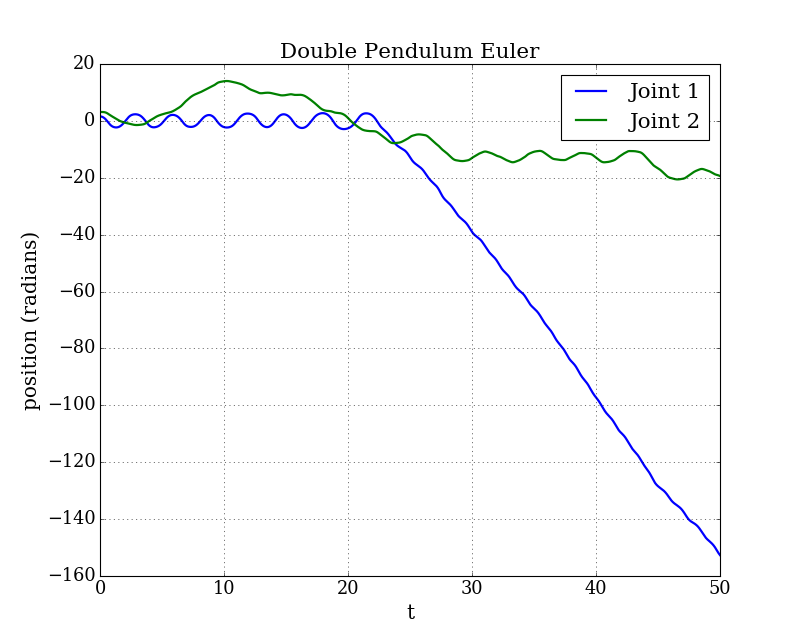

<IPython.core.display.Javascript object>


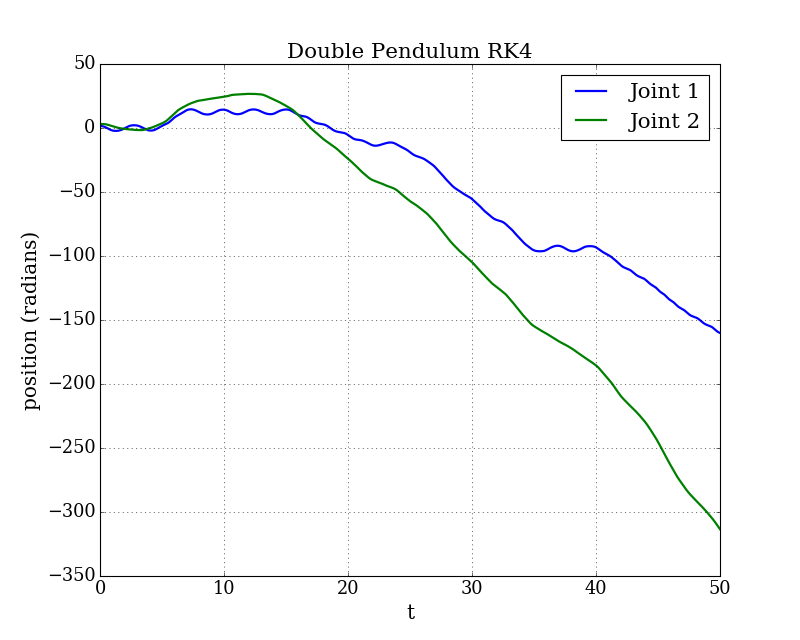

In [42]:
#Euler
x1_dp = numpy.zeros((N,4)) 
x1_dp[0,:] = x_init_dp.copy() #set initial conditions
for n in range(N-1):  #integrate with Euler
    x1_dp[n+1,:] = euler_DP(x1_dp[n,:], f_double_pendulum, dt)
    
#Runge-Kutta
x4_dp = numpy.zeros((N,4)) 
x4_dp[0,:] = x_init_dp.copy() #set initial conditions
for n in range(N-1):  #integrate with RK4
    x4_dp[n+1,:] = RK4_DP(x4_dp[n,:], f_double_pendulum, dt)
    
pyplot.figure(figsize=(10,8));
pyplot.grid(True);
pyplot.xlabel(r't', fontsize=18);
pyplot.ylabel(r'position (radians)', fontsize=18);
pyplot.title('Double Pendulum Euler');
pyplot.plot(t, x1_dp[:,0], lw=2, label='Joint 1');
pyplot.plot(t, x1_dp[:,1], lw=2, label='Joint 2')
pyplot.legend();

pyplot.figure(figsize=(10,8));
pyplot.grid(True);
pyplot.xlabel(r't', fontsize=18);
pyplot.ylabel(r'position (radians)', fontsize=18);
pyplot.title('Double Pendulum RK4');
pyplot.plot(t, x4_dp[:,0], lw=2, label='Joint 1');
pyplot.plot(t, x4_dp[:,1], lw=2, label='Joint 2')
pyplot.legend();

Again, we can see that these integrators cause the system to go unstable. In fact, there is a physical interpretation for what is happening. In the Euler plot, you can see the position of joint 1 oscillating between almost -pi and almost pi (corresponding to straight up in the air), until it finally reaches a value greater than pi. So, once joint 1 'flips around,' the system diverges.

With simple harmonic motion, the symplectic integrator was able to accurately represent the state of the system without adding energy. Let's see if it is successful with the double pendulum. 

In [43]:
def Verlet_DP(u, dt):
    """ Verlet integration for integrating from Hamiltonian equations of motion
            for a ddouble pendulum
    Parameters:
        u - state at current time step
        dt - time step size
    Returns: 
        state at next time step.
    """
    q1 = u[0]
    p1 = u[1]
    q2 = u[2]
    p2 = u[3]
    
    p1_half = p1 - dt/2*(p1*p2/(m1*l1*l2)*sin(q2-q1)+(m1+m2)*g*l1*sin(q1))
    q1_plus = q1 + dt*(-p1_half/I1 - m2*p1_half/(m1*I1) - p2/(m1*l1*l2)*cos(q2-q1))
    p1_plus = p1_half - dt/2*(p1*p2/(m1*l1*l2)*sin(q2-q1_plus)+(m1+m2)*g*l1*sin(q1_plus))
    
    p2_half = p2 - dt/2*( -p1*p2/(m1*l1*l2)*sin(q2-q1) + m2*g*l2*sin(q2))
    q2_plus = q2 + dt*(-p1/(m1*l1*l2)*cos(q2-q1) - p2_half/I2)
    p2_plus = p2_half - dt/2*( -p1*p2/(m1*l1*l2)*sin(q2_plus-q1) + m2*g*l2*sin(q2_plus))
     
    return numpy.array([q1_plus, p1_plus, q2_plus, p2_plus]) 

<IPython.core.display.Javascript object>


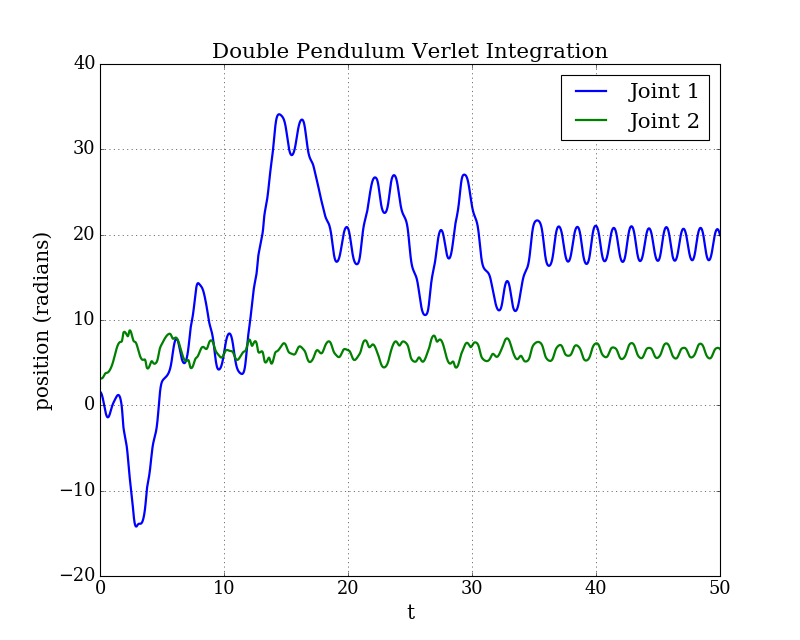

In [44]:
#Verlet integration
xv_dp = numpy.zeros((N,4)) 
xv_dp[0,:] = x_init_H_dp.copy() #set initial conditions
#print(q3_dp[0,:])
for n in range(N-1):  #integrate with Euler
    xv_dp[n+1,:] = Verlet_DP(xv_dp[n,:], dt)
    
pyplot.figure(figsize=(10,8));
pyplot.grid(True);
pyplot.xlabel(r't', fontsize=18);
pyplot.ylabel(r'position (radians)', fontsize=18);
pyplot.title('Double Pendulum Verlet Integration');
pyplot.plot(t, xv_dp[:,0], lw=2, label='Joint 1');
pyplot.plot(t, xv_dp[:,2], lw=2, label='Joint 2')
pyplot.legend();

This certainly looks better! It's an interesting result. There is clearly some periodicity, although the motion isn't exactly periodic. But how accurate is this simulation? The short answer is that since we don't have an analytical solution, it is difficult to know exactly. However, there are still some properties of the system that we can look at. For one thing, the total energy in the system should be constant. Let's see if that is the case.

Recall from the analysis above that the total energy is the combined potential and kinetic energy at each time step.

$$\begin{eqnarray*}
U &=& -m_1gl_1cos(q_1) - m_2g(l_1cos(q_1) + l_2cos(q_2))\\
T &=& \frac{p_1^2}{2I_1}+\frac{m_2p_1^2}{2m_1I_1}  + \left[ \frac{p_2}{l_2} \frac{p_1}{m_1l_1}cos(q_2-q_1) + \frac{p_2^2}{2I_2} \right]
\end{eqnarray*}$$



In [45]:
def get_Energy(u):
    """ Calculates total energy in the system at given time step for a simple harmonic oscillator
    Parameters:
        u - state of system  [pos, vel]
    Returns:
        total energy in system.
    """
    q1 = u[0]
    p1 = u[1]
    q2 = u[2]
    p2 = u[3]
    #make sure q1 and q1 are between 0 and 2pi. 
    while q1 > 2*pi:
        q1 -= 2*pi
    while q2 > 2*pi:
        q2 -= 2*pi
    while q1 < 0:
        q1+=2*pi
    while q2 <0:
        q2+=2*pi 
    
    
    V = -m1*g*l1*cos(q1) - m2*g*l1*cos(q1)+l2*cos(q2)
    T = p1**2/(2*I1)+m2*p1**2/(2*m1*I1) + p1*p2/(m1*l1*l2)*cos(q2-q1)+p2**2/(2*I2)
    return T+V


<IPython.core.display.Javascript object>


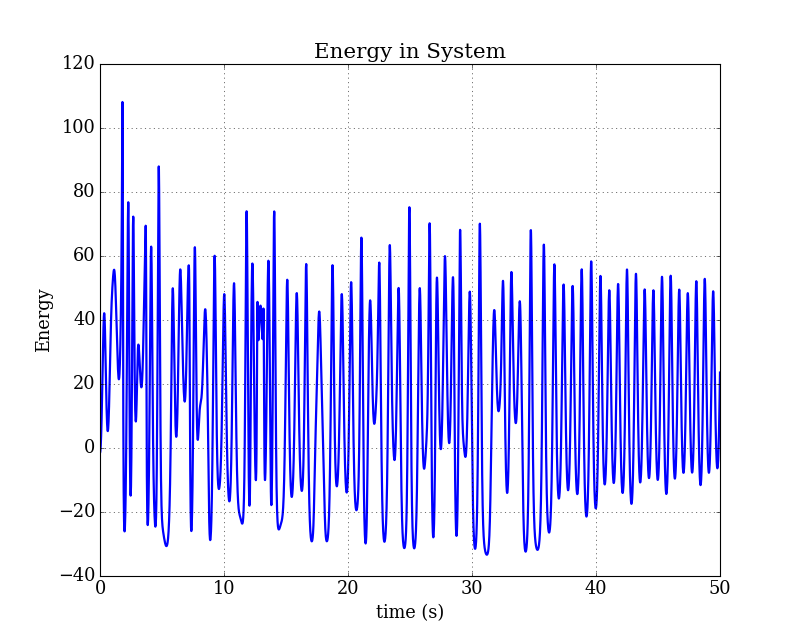

In [46]:
Verlet_energy = numpy.zeros_like(t)
Verlet_vel1 = xv_dp[:,1]/m1
Verlet_vel2 = xv_dp[:,3]/m2
RK4_energy = numpy.zeros_like(t)


u = numpy.array([xv_dp[:,0], Verlet_vel1, xv_dp[:,2], Verlet_vel2])
#print(u[0,:])
for i in range(N):
    Verlet_energy[i] = get_Energy(u[:,i])
    #RK4_energy[i] = get_Energy(x4_dp[i,:])

    

pyplot.figure(figsize=(10,8));
pyplot.grid(True);

pyplot.title('Energy in System');
ax1 = pyplot.gca()
pyplot.plot(t, Verlet_energy, lw=2, label='Verlet', color='b');
pyplot.xlabel('time (s)')
pyplot.ylabel('Energy')

## use to plot RK4 energy on same graph.
#for tl in ax1.get_yticklabels():
#    tl.set_color('b')

#ax2 = ax1.twinx();
#ax2.plot(t, RK4_energy, 'r', lw=2, label='RK4')
#for tl in ax2.get_yticklabels():
#    tl.set_color('r')

#ax1.set_xlabel('time (s)')
#ax1.set_ylabel('Verlet', color='b')
#ax2.set_ylabel('RK4', color='r')


So, we are very far from perfect. But, at least with Verlet the energy in the system is stable, even if it isn't constant! 

### Investigating system behavior

In order to investigate system behavior for damped harmonic motion, we used a phase portrait where we plotted position vs. velocity. In this system, we have 2 positions and 2 velocities, so a phase plot won't accurately capture the behavior of the system. Instead we are going to use something called a Poincare section (https://en.wikipedia.org/wiki/Poincar%C3%A9_map). The way these work is to capture the system behavior at a specific, repetetive point. For example, each time that $\theta_2 = 0$ or any multiple of 2*pi (mass 2 is hanging straight down) we can capture the angular position and velocity of mass 2. This way, we are taking a 'snapshot' of the system, and plotting the state each time. We can now investigate system behavior on a simple 2D plot, similar to the phase portrait.

In [47]:
def poincare(state, sf, val, s1, s2):
    '''Creates a poincare section, capturing system state each time q[state]=val
    
    Parameters:
        state - state vector
        sf - the row in q to fix
        val - the value to capture state at 
        s1 - state to capture 1
        s2 - state to capture 2
        
    Returns:
        v - array with information for poincare section
    '''
    v = numpy.zeros((2,1))
    for i in range(len(state[:,sf])-1):
        if (state[i,sf]>val):
            if (state[i+1,sf] < val):
                v = numpy.append(v, [[state[i, s1]],[state[i, s2]]], axis=1)
        
        if (state[i,sf] < val):
            if (state[i+1,sf] > val):
                v = numpy.append(v, [[state[i, s1]],[state[i, s2]]], axis=1)
                         
    return v

<IPython.core.display.Javascript object>


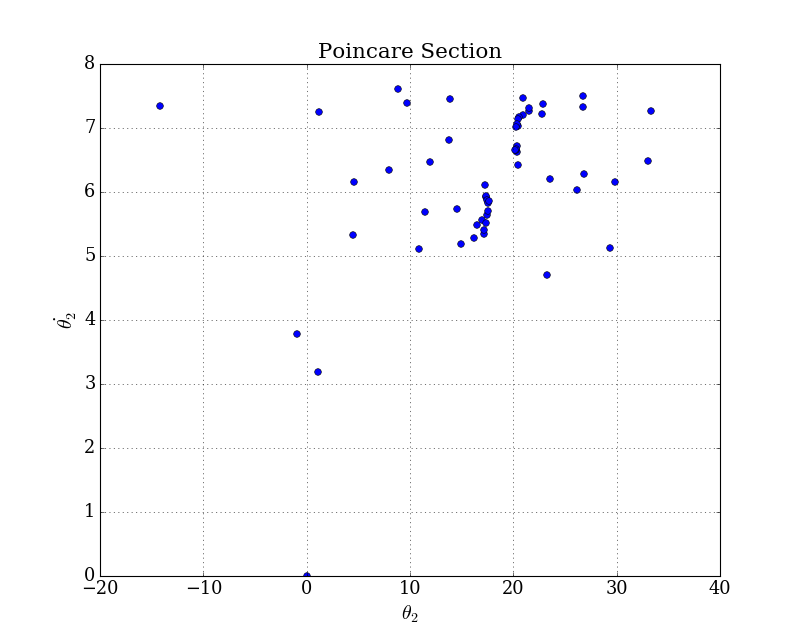

In [48]:
v = poincare(xv_dp, 1, 2*pi, 0, 2) #use states from RK4 integration
pyplot.figure(figsize=(10,8));
pyplot.grid(True);
pyplot.xlabel(r'$\theta_2$', fontsize=18);
pyplot.ylabel(r'$\dot{\theta_2}$', fontsize=18);
pyplot.title('Poincare Section');
pyplot.plot(v[0,:], v[1,:], 'bo', lw=2, );

There isn't a clear pattern here, although there is some clustering. So, we can say that our system is NOT likely to be asymptotically stable. However, this shouldn't be surprising. If we continued simulating, our system would continue rotating since there is no damping. Let's see what happens when there is some damping in the system. We're going to use RK4 for the following analysis.

### Damped Double Pendulum

Just like with simple harmonic motion, we can add in a damping term to help remove some of the energy that the integration scheme adds in. In the problem setup, we actually used an abbreviated form of a standard equation. The full equation is here:

\begin{equation}
\textbf{M}(x)\vec{\ddot{x}}(t)  + \textbf{V}(x, \dot x ) \vec{\dot{x}} + \textbf{G(x)} + f(\dot x) + \tau_d(t) = \tau(t)
\end{equation}

where $\textbf{M, V}$, and $\textbf{G}$ are defined as above, $f$ is frictional or damping terms, and the $\tau$ terms represent added torque to the system. Since we aren't adding any torque, the $\tau$ terms will remain 0. However, we can add in some linear damping by including the frictional term. This requires redefining our RHS function, but no other changes!

In [49]:
def f_damped_double_pendulum(u):
    """Returns RHS of double pendulum EOM with damping
    
    Parameters:
        u - initial state
    
    Returns:
        RHS - RHS of harmonic oscillator eqn.
    
    """
    x1 = u[0]
    x2 = u[1]
    x3 = u[2]
    x4 = u[3]
    
    M = numpy.array([[(m1+m2)*l1**2, m2*l1*l2*cos(x2-x1)],[m2*l1*l2*cos(x2-x1), m2*l2**2]])
    V = numpy.array([[0, -m2*l1*l2*sin(x2-x1)],[-m2*l1*l2*sin(x2-x1), 0]])
    G = numpy.array([[(m1+m2)*g*l1*sin(x1)],[m2*l2*g*sin(x2)]])
    f = c*numpy.array([[x3],[x4]])
    qdd = numpy.linalg.inv(M).dot(V.dot(numpy.array([[x3],[x4]]))+G -f) 
    RHS = numpy.array([x3, x4, qdd[0], qdd[1]])
    return RHS.T

<IPython.core.display.Javascript object>


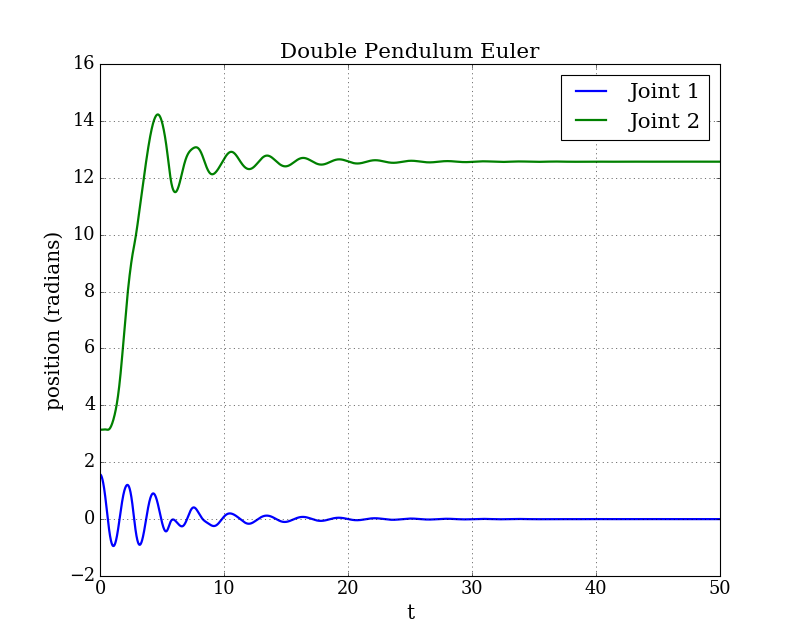

<IPython.core.display.Javascript object>


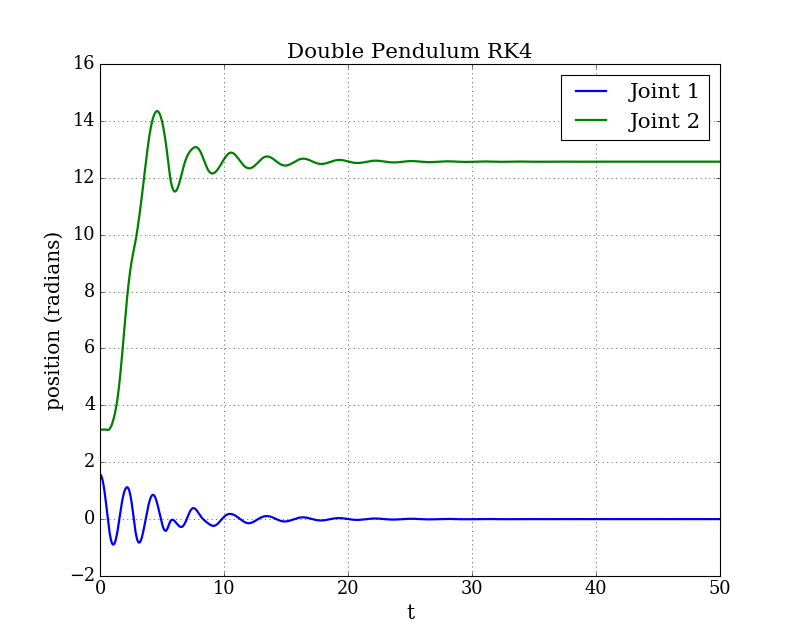

In [50]:
#We use the same initial conditions as the example without damping, so they aren't redefined here.
c = 2 #[N/(rad/s)] define some damping

#Euler
q1d_dp = numpy.zeros((N,4)) 
q1d_dp[0,:] = x_init_dp.copy() #set initial conditions
for n in range(N-1):  #integrate with Euler
    q1d_dp[n+1,:] = euler_DP(q1d_dp[n,:], f_damped_double_pendulum, dt)
    
    
#Runge-Kutta
q4d_dp = numpy.zeros((N,4)) 
q4d_dp[0,:] = x_init_dp.copy() #set initial conditions
for n in range(N-1):  #integrate with Euler
    q4d_dp[n+1,:] = RK4_DP(q4d_dp[n,:], f_damped_double_pendulum, dt)
    
pyplot.figure(figsize=(10,8));
pyplot.grid(True);
pyplot.xlabel(r't', fontsize=18);
pyplot.ylabel(r'position (radians)', fontsize=18);
pyplot.title('Double Pendulum Euler');
pyplot.plot(t, q1d_dp[:,0], lw=2, label='Joint 1');
pyplot.plot(t, q1d_dp[:,1], lw=2, label='Joint 2')
pyplot.legend();

pyplot.figure(figsize=(10,8));
pyplot.grid(True);
pyplot.xlabel(r't', fontsize=18);
pyplot.ylabel(r'position (radians)', fontsize=18);
pyplot.title('Double Pendulum RK4');
pyplot.plot(t, q4d_dp[:,0], lw=2, label='Joint 1');
pyplot.plot(t, q4d_dp[:,1], lw=2, label='Joint 2')
pyplot.legend();

It looks like the system is chaotic at first, but becomes periodic as it settles.

Let's do a Poincare section of this plot as well. For brevity, we'll use only the RK4 system response.

<IPython.core.display.Javascript object>


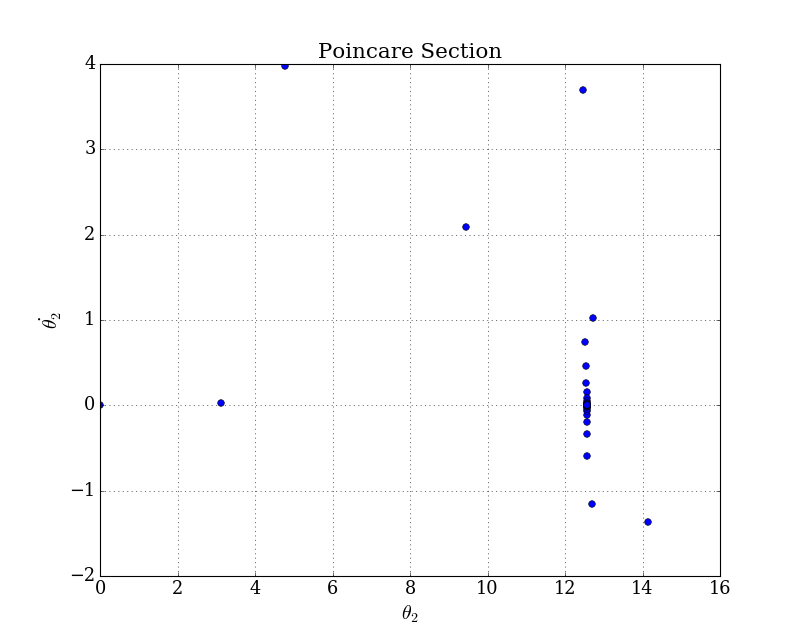

In [51]:
v = poincare(q4d_dp, 0, 0, 1, 3) #use states from RK4 integration
pyplot.figure(figsize=(10,8));
pyplot.grid(True);
pyplot.xlabel(r'$\theta_2$', fontsize=18);
pyplot.ylabel(r'$\dot{\theta_2}$', fontsize=18);
pyplot.title('Poincare Section');
pyplot.plot(v[0,:], v[1,:], 'bo', lw=2);


Other than a few outliers, the plot converges seems to converge. So, this system is stable! This would not be the case for our undamped double pendulum, as integrated by RK4. 

Sources: 

[1] http://scienceworld.wolfram.com/physics/DoublePendulum.html

[2] http://www.phy.uct.ac.za/courses/opencontent/phylab2/worksheet9_09.pdf

[3] http://www.phys.lsu.edu/faculty/gonzalez/Teaching/Phys7221/DoublePendulum.pdf

[4] http://www.iontrap.wabash.edu/adlab/papers/F2011_foster_groninger_tang_chaos.pdf

[5] https://math.berkeley.edu/~alanw/242papers99/markiewicz.pdf

[6] http://www.unige.ch/~hairer/poly_geoint/week2.pdf

[7] http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1994CeMDA..60..409T&defaultprint=YES&filetype=.pdf



In [52]:
# This cell loads the style of the notebook, which is modified from the 
# Numerical Methods in Python Course: http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about

from IPython.core.display import HTML
css_file = './numericalmoocstyle.css'
HTML(open(css_file, "r").read())